# Imputación de Datos

**Imputación de Datos**

Por varias razones, muchos conjuntos de datos del mundo real contienen valores faltantes, a menudo codificados como espacios en blanco, NaNs u otros marcadores de posición. Sin embargo, estos conjuntos de datos son incompatibles con los estimadores de scikit-learn, que asumen que todos los valores de un arreglo son numéricos y que todos tienen y contienen un significado. Una estrategia básica para utilizar conjuntos de datos incompletos es descartar filas y/o columnas enteras que contienen valores faltantes.

Sin embargo, esto tiene el riesgo de perder datos que pueden ser valiosos (aunque sean incompletos). Una estrategia mejor es imputar los valores que faltan, es decir, deducirlos de la parte conocida de los datos. Consulta la entrada de Glosario de Términos Comunes y Elementos de la API sobre la imputación.


Para este utilizaremos NUMPY Y SKLEARN

In [2]:
import numpy as np
from sklearn.impute import SimpleImputer

***Para una Matriz ***

In [3]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
 #Vamos a declarar una imputación simple con valores nulos
 # y una estrategia de promedio

In [4]:
matriz = [[17, 15], [np.nan, 8], [15, 4], [8,6]]

In [5]:
print(matriz)

[[17, 15], [nan, 8], [15, 4], [8, 6]]


In [6]:
imp.fit(matriz) #montar el imputador en la matriz, este calculará de acuerdo a la estrategía.

SimpleImputer(strategy='median')

In [7]:
print(imp.transform(matriz)) #imp.transform ajustara los datos y luego transformarlos.

[[17. 15.]
 [15.  8.]
 [15.  4.]
 [ 8.  6.]]


In [8]:
matriz

[[17, 15], [nan, 8], [15, 4], [8, 6]]

In [9]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[15.  2.]
 [ 6.  7.]
 [ 7.  6.]]


**Para una Matriz Dispersa**

¿Qué son las matrices dispersas?
Los arreglos dispersos son arreglos en los que solo unas pocas ubicaciones del conjunto tienen datos; la mayoría de las ubicaciones se consideran "vacías".

csc_matrix Las matrices dispersas se pueden utilizar en operaciones aritméticas: admiten suma, resta, multiplicación, división y potencia matricial.


In [10]:
import scipy.sparse as sp

In [11]:
imp = SimpleImputer(missing_values=-2, strategy='median')

In [12]:
matriz_x = sp.csc_matrix([[1,2 ], [-2, -1], [8, 4], [-2, 5]])

In [13]:
imp.fit(matriz_x)

SimpleImputer(missing_values=-2, strategy='median')

In [14]:
print(imp.transform(matriz_x).toarray()) #imp.transform ajustara los datos y luego transformarlos.


[[ 1.   2. ]
 [ 4.5 -1. ]
 [ 8.   4. ]
 [ 4.5  5. ]]


**Datos Categoricos**

La clase SimpleImputer también soporta datos categóricos representados como valores de cadena o categóricos de pandas cuando se utiliza la estrategia 'most_frequent' o 'constant':

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame([["c", "x"],
                   [np.nan, "y"],
                   ["x", np.nan],
                   ["b", "y"]], dtype="category")


In [17]:
print(df)

     0    1
0    c    x
1  NaN    y
2    x  NaN
3    b    y


In [18]:
imp = SimpleImputer(strategy="most_frequent") #la regla aquí sera el remplazo por el mas frecuente


In [19]:
print(imp.fit_transform(df))

[['c' 'x']
 ['b' 'y']
 ['x' 'y']
 ['b' 'y']]


**Imputación de características multivariantes**

Un enfoque más sofisticado es utilizar la clase ***IterativeImputer***, que modela cada característica con valores faltantes como una función de otras características, y utiliza esa estimación para la imputación. Lo hace de forma iterativa rotatoria: en cada paso, una columna de características se designa como salida y y las otras columnas de características se tratan como entradas X.

*Nota Este estimador sigue siendo experimental por ahora: los parámetros predeterminados o los detalles de comportamiento podrían cambiar sin ningún ciclo de obsolescencia*

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
imp = IterativeImputer(max_iter=8, random_state=0)

In [22]:
m_y =([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

In [23]:
imp.fit(m_y)

IterativeImputer(max_iter=8, random_state=0)

In [24]:
# el modelo aprende que la segunda característica es el doble de la primera
print(np.round(imp.transform(m_y)))

[[ 1.  2.]
 [ 3.  6.]
 [ 4.  8.]
 [ 2.  3.]
 [ 7. 14.]]


**Imputación de vecinos más cercanos (K vecinos)**

La clase ***KNNImputer*** proporciona la imputación para rellenar los valores faltantes utilizando el enfoque de k-Nearest Neighbors.


Por defecto, se utiliza una métrica de ***distancia euclidiana ***que soporta los valores faltantes, nan_euclidean_distances, para encontrar los vecinos más cercanos.


¿Cómo funciona?

1. Cada característica que falta se imputa utilizando los valores de los «vecinos más cercanos» que tienen un valor para la característica.

2. La característica de los vecinos se promedia uniformemente o se pondera por la distancia a cada vecino. Si a una muestra le falta más de una característica, los vecinos de esa muestra pueden ser diferentes en función de la característica concreta que se impute.

3. Cuando el número de vecinos disponibles es inferior a n_neighbors y no hay distancias definidas con el conjunto de entrenamiento, se utiliza la media del conjunto de entrenamiento para esa característica durante la imputación.

4. Si hay al menos un vecino con una distancia definida, durante la imputación se utilizará la media ponderada o no ponderada de los vecinos restantes. Si una característica siempre falta en el entrenamiento, se elimina durante la transformación

In [25]:
from sklearn.impute import KNNImputer

In [26]:
import numpy as np

In [27]:
nan = np.nan # es un valor especial de la librería NumPy que representa el valor nulo.

In [28]:
x = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
print(x)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]


In [29]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [30]:
imputer.fit_transform(x)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

Consulta más información en:
**https://qu4nt.github.io/sklearn-doc-es/modules/impute.html**

## Actividad

In [31]:
mat2 = [[34,56],[72,24],[23,87],[np.nan, 35]]
print(mat2)
s_imp = SimpleImputer(missing_values=np.nan, strategy='median')
print(s_imp.fit(mat2))
print(s_imp.transform(mat2))

knn_imp = KNNImputer(n_neighbors=2, weights="uniform")
print(knn_imp.fit(mat2))
print(knn_imp.transform(mat2))




[[34, 56], [72, 24], [23, 87], [nan, 35]]
SimpleImputer(strategy='median')
[[34. 56.]
 [72. 24.]
 [23. 87.]
 [34. 35.]]
KNNImputer(n_neighbors=2)
[[34. 56.]
 [72. 24.]
 [23. 87.]
 [53. 35.]]


#Outliers


Los outliers o valores atípicos son puntos de datos que se alejan significativamente del resto de observaciones en un conjunto de datos, ya sea por ser inusualmente grandes o pequeños en comparación con el resto. Pueden surgir por la propia variabilidad del conjunto de datos o por errores de medición o de entrada.

Dependiendo de sus características, los outliers pueden clasificarse en varios tipos, destacando los siguientes:

Valores atípicos univariados — Son puntos de datos inusuales en base a una sola variable.
Valores atípicos multivariados — Se basan en la relación entre al menos dos variables. Son puntos de datos que pueden no ser considerados atípicos cuando se analizan individualmente, pero su combinación o relación con otras variables los hace inusuales.

In [32]:
# Vamos a importar las librerias necesarias
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
# cargaremos el dataset llamado diabetes el cual esta dentro de sklearn
diabetics = load_diabetes()

In [34]:
# Vamos a crear un dataframe, por la libreria pandas
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name


In [35]:
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


Los valores atípicos se pueden detectar mediante visualización, implementando fórmulas matemáticas en el conjunto de datos o utilizando un enfoque estadístico. Todos estos se analizan a continuación.



**Visualización y eliminación de valores atípicos mediante diagrama de caja**





Captura el resumen de los datos de manera efectiva y eficiente con solo una simple caja y bigotes. Boxplot resume datos de muestra utilizando los percentiles 25, 50 y 75. Uno puede obtener información (cuartiles, mediana y valores atípicos) sobre el conjunto de datos con solo mirar su diagrama de caja.



<Axes: >

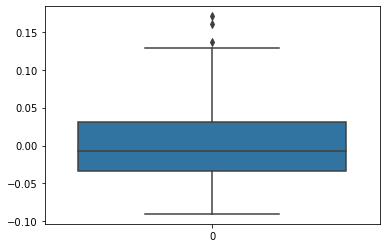

In [36]:
# Box Plot
import seaborn as sns
import numpy as np
sns.boxplot(df_diabetics['bmi']) #bmi es el indice de masa corporal


Se puede ver claramente que los valores superiores a 10 actúan como valores atípicos.

In [37]:
#Vamos a remover los valores atipicos
def removal_box_plot(df, column, threshold):
	sns.boxplot(df[column])
	plt.title(f'Box Plot Original de {column}')
	plt.show()

	removed_outliers = df[df[column] <= threshold]

	sns.boxplot(removed_outliers[column])
	plt.title(f'Box Plot sin valores atipicos de{column}')
	plt.show()
	return removed_outliers


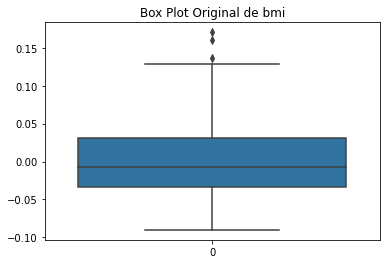

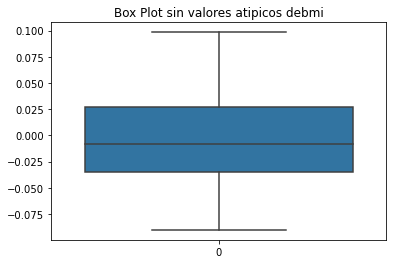

In [38]:
threshold_value = 0.10

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)


**Visualización y eliminación de valores atípicos mediante diagrama de dispersión**


Se utiliza cuando tiene datos numéricos emparejados y cuando su variable dependiente tiene múltiples valores para cada variable independiente de lectura, o cuando intenta determinar la relación entre las dos variables. En el proceso de utilizar el diagrama de dispersión , también se puede utilizar para la detección de valores atípicos.

Para trazar el diagrama de dispersión se necesitan dos variables que de alguna manera estén relacionadas entre sí. Entonces, aquí se utilizan el bp que es la presión sanguiniea y el indice de masa corporal.

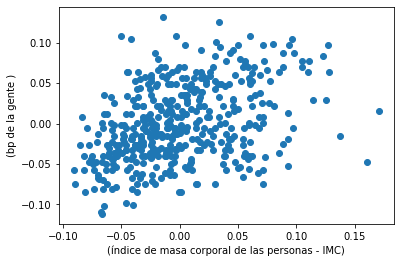

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(índice de masa corporal de las personas - IMC)')
ax.set_ylabel('(bp de la gente )')
plt.show()


Al mirar el gráfico se puede resumir que la mayoría de los puntos de datos están en la esquina inferior izquierda del gráfico, pero hay algunos puntos que están exactamente opuestos a la esquina superior derecha del gráfico. Los puntos de la esquina superior derecha pueden considerarse valores atípicos.

El uso de la aproximación puede decir que todos esos puntos de datos que son x>20 y y>600 son valores atípicos. El siguiente código puede recuperar la posición exacta de todos aquellos puntos que cumplan estas condiciones

Vamos a realizar **la eliminación de valores atípicos en las columnas de IMC y PA combinadas**  Aquí, la función de NumPy np.where()se utiliza para encontrar las posiciones (índices) donde la condición (df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8)es verdadera en el DataFrame df_diabetics. La condición busca valores atípicos en los que 'bmi' sea mayor que 0,12 y 'bp' sea menor que 0,8. El resultado proporciona los índices de filas y columnas de las posiciones atípicas en el DataFrame.



In [40]:
#outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))
outlier_indices = np.where((df_diabetics['bmi'] > 0.10) & (df_diabetics['bp'] < 0.5))
no_outliers = df_diabetics.drop(outlier_indices[0])

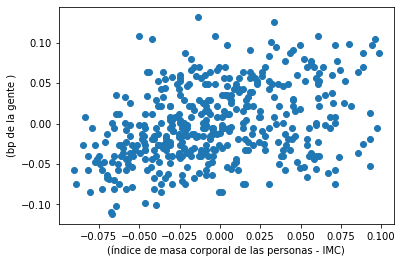

In [41]:
# Diagrama de dispersión sin valores atípicos
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(índice de masa corporal de las personas - IMC)')
ax_no_outliers.set_ylabel('(bp de la gente )')
plt.show()


## Actividad

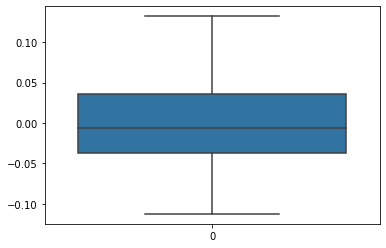

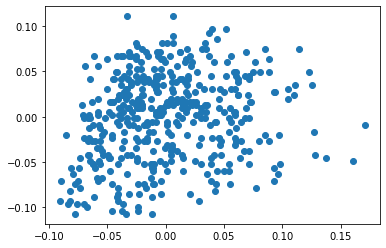

In [42]:
sns.boxplot(df_diabetics['bp']) #bmi es el indice de masa corporal

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['age'])

outlier_indices = np.where((df_diabetics['bmi'] > 0.10) & (df_diabetics['age'] < 0.5))
no_outliers = df_diabetics.drop(outlier_indices[0])

**Puntuación Z**


La puntuación Z también se denomina puntuación estándar. Este valor/puntuación ayuda a comprender qué tan lejos está el punto de datos de la media. Y después de establecer un valor umbral, se pueden utilizar valores de puntuación z de puntos de datos para definir los valores atípicos.

Puntuación Z = (punto_datos -media) / estándar. desviación



In [43]:
from scipy import stats

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


Ahora, para definir un valor umbral atípico, se elige que generalmente es 3,0. Dado que el 99,7% de los puntos de datos se encuentran entre +/- 3 desviaciones estándar (utilizando el enfoque de distribución gaussiana).



In [44]:
threshold_z = 2
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Forma de los datos originales:", df_diabetics.shape)
print("Forma de los datos después de eliminar valores atípicos:", no_outliers.shape)

Forma de los datos originales: (442, 10)
Forma de los datos después de eliminar valores atípicos: (426, 10)


Más información en:
https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/


#Conversión de categóricos a numéricos

In [45]:
#@title **Método One-Hot**
from IPython.display import Image
Image("/content/drive/MyDrive/Machine learning códigos - abril/onehot.51.14 PM.jpeg")

FileNotFoundError: No such file or directory: '/content/drive/MyDrive/Machine learning códigos - abril/onehot.51.14 PM.jpeg'

FileNotFoundError: No such file or directory: '/content/drive/MyDrive/Machine learning códigos - abril/onehot.51.14 PM.jpeg'

<IPython.core.display.Image object>